<a href="https://colab.research.google.com/github/rahool010/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Description**

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

### Further based on different features of mobile phones, develop a model that would classify each mobile into different categories of price range, i.e., into categorical value of 0 (low), 1 (Medium), 2 (High) and 3 (Very High).

# **Data Description**

### Battery_power - Total energy a battery can store in one time measured in mAh

### Blue - Has bluetooth or not

### Clock_speed - speed at which microprocessor executes instructions

### Dual_sim - Has dual sim support or not

### Fc - Front Camera mega pixels

### Four_g - Has 4G or not

### Int_memory - Internal Memory in Gigabytes

### M_dep - Mobile Depth in cm

### Mobile_wt - Weight of mobile phone

### N_cores - Number of cores of processor

### Pc - Primary Camera mega pixels

### Px_height - Pixel Resolution Height

### Px_width - Pixel Resolution Width

### Ram - Random Access Memory in Mega Bytes

### Sc_h - Screen Height of mobile in cm

### Sc_w - Screen Width of mobile in cm

### Talk_time - longest time that a single battery charge will last when you are

### Three_g - Has 3G or not

### Touch_screen - Has touch screen or not

### Wifi - Has wifi or not

### Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report 

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Mobile Price Range Prediction - Rahul Shah/data_mobile_price_range.csv")

In [ ]:
# lets check the first 5 and last 5 observations
df.head().append(df.tail())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# checking shape of dataset
print(df.shape)

(2000, 21)


In [ ]:
# check data types 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# let's see the descriptive stats of all the features
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


From the above analysis we see there are few dichotomouse type variables such as bluetooth, dual sim, 4G, 3G, touch screen and wifi. We have low range features such as clock speed, front camera, primary camera, screen height, screen width and talktime. We also have two nominal type features such as n_cores and m_dep and other numerical variables which has high range.

In [ ]:
# printing unique values of each column 
for col in df.columns:
  print(f"{col}: \t{df[col].nunique()}") 

battery_power: 	1094
blue: 	2
clock_speed: 	26
dual_sim: 	2
fc: 	20
four_g: 	2
int_memory: 	63
m_dep: 	10
mobile_wt: 	121
n_cores: 	8
pc: 	21
px_height: 	1137
px_width: 	1109
ram: 	1562
sc_h: 	15
sc_w: 	19
talk_time: 	19
three_g: 	2
touch_screen: 	2
wifi: 	2
price_range: 	4


In [ ]:
dependant = 'price_range'
cat_features = []
independant = list(set(df.columns) - {dependant})
num_features = []

for col in independant:
  if (df[col].nunique() < 10):
    cat_features.append(col)
  else:
    num_features.append(col) 
num_features = list(set(df.columns) - set(cat_features) - {dependant})

### **Exploratory Data Analysis**

**Our dependant variable - price_range**

In [ ]:
# let's see the count of each of these categories
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

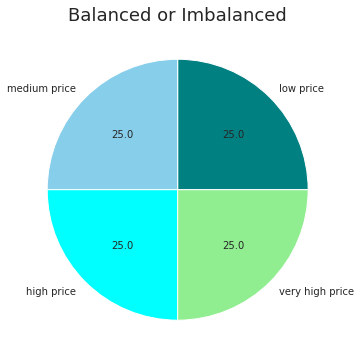

In [ ]:
# Visualize the dependant variable
plt.figure(figsize=(14,6)) 
labels = ['low price','medium price','high price','very high price']
plt.pie(df['price_range'].value_counts(), labels=labels,
        colors=['teal','skyblue','aqua','lightgreen'], autopct='%1.1f')
plt.title('Balanced or Imbalanced', fontsize=18)
plt.show()

The above graph shows there are equal number of observations for each price range.

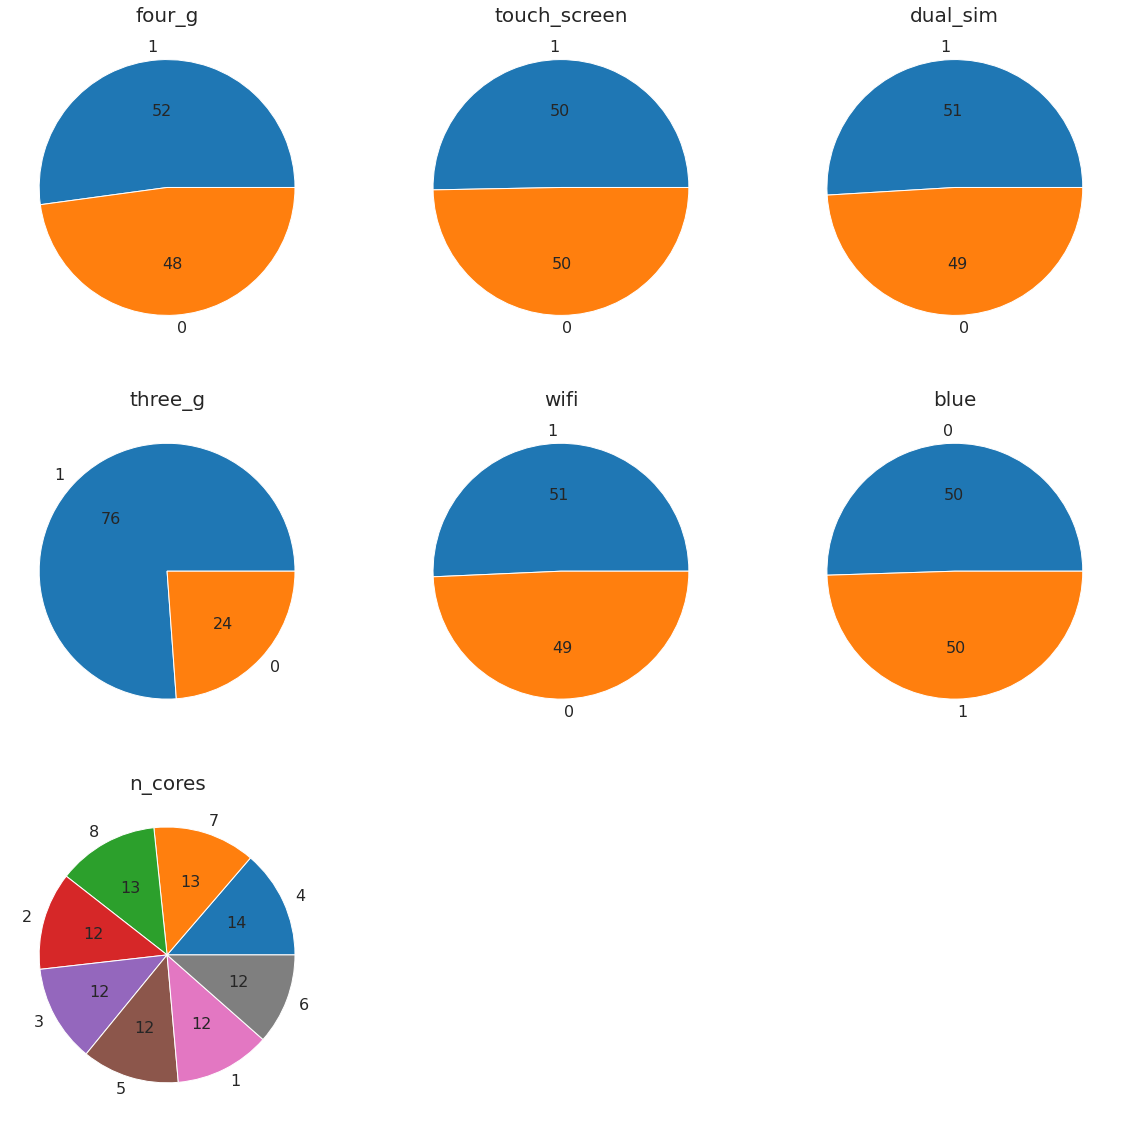

In [ ]:
# visualizing distribution of counts among different variables
plt.figure(figsize=(20,20))
for i, col in enumerate(cat_features):
    plt.subplot(3,3,i+1)
    df[col].value_counts().plot(kind = 'pie', fontsize=16, autopct='%.0f')
    plt.ylabel('')
    plt.title(col,fontsize=20)
    #plt.legend(loc='best',{0:'No',1:'Yes'})
plt.show()

* From the above graph we see there are almost equal number of oservations for all except three_g where 76% is one class.
* In n_cores we can see that there are almost eqaul number of observations for each core with highest observation for 4 cores

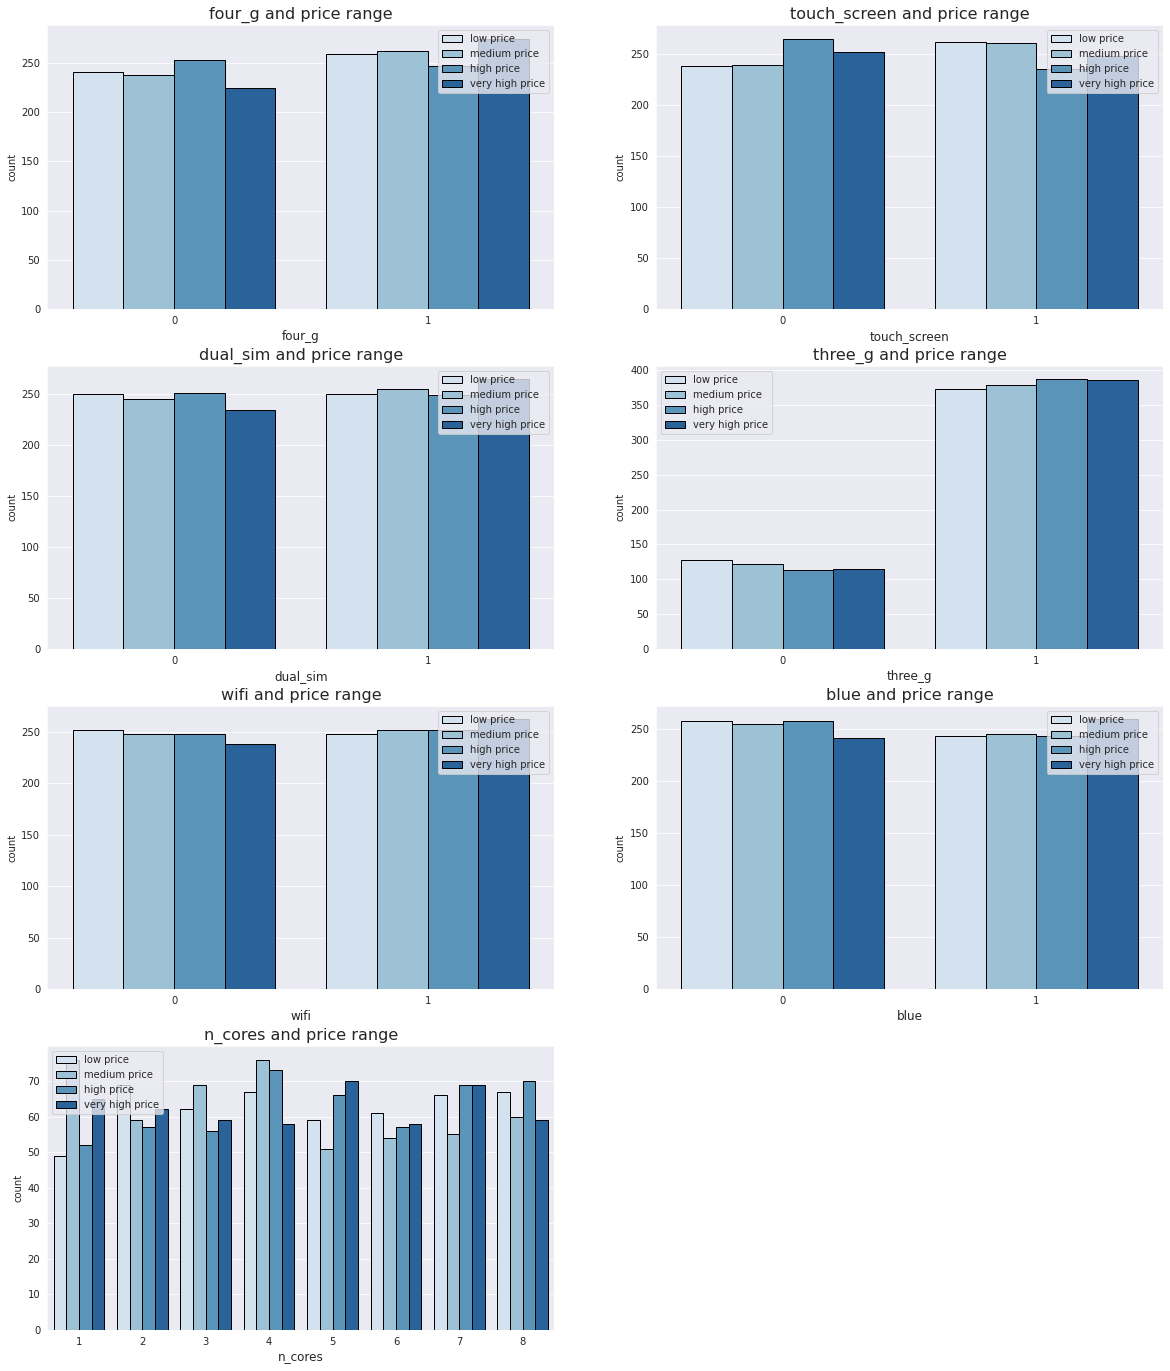

In [ ]:
# visualizing using barplot
plt.figure(figsize=(20,24))
num=1
for col in cat_features:
  ax = plt.subplot(4,2,num)
  sns.countplot(df[col], hue=df['price_range'], palette='Blues',edgecolor='black')
                #edgecolor='k')
  plt.title(f'{col} and price range', fontsize=16)
  plt.xlabel(col,fontsize=12)
  plt.legend(['low price','medium price','high price','very high price'])
  num+=1
plt.tight_layout
plt.show()

#### **Conclusions**
* It's strange to see that there are almost equal number of expensive phones and cheap phones that don't support 3G. This is probably due to the fact that the dataset contains a lot of old phones.
* Whereas mobiles having 4G are more in very high price range category.
* Expensive phones tend to support dual-sim, four_g. Makes sense.
* More expensive phones have bluetooth, although the difference between price ranges are not that extreme. / This supports the claim that the dataset is pretty outdated since almost all phones these days have bluetooth.
* It's also strange that most of the phones having touch screen are also cheaper. Vice-versa, phones that don't support touch screen tend to be more expensive.
* A small linear trend is visble in wifi. Phone's that dont support wifi are cheaper and phones that support it are more expensive.

#### **Variables having low range values - clock_speed, fc, pc, sc_h, sc_w, talktime**


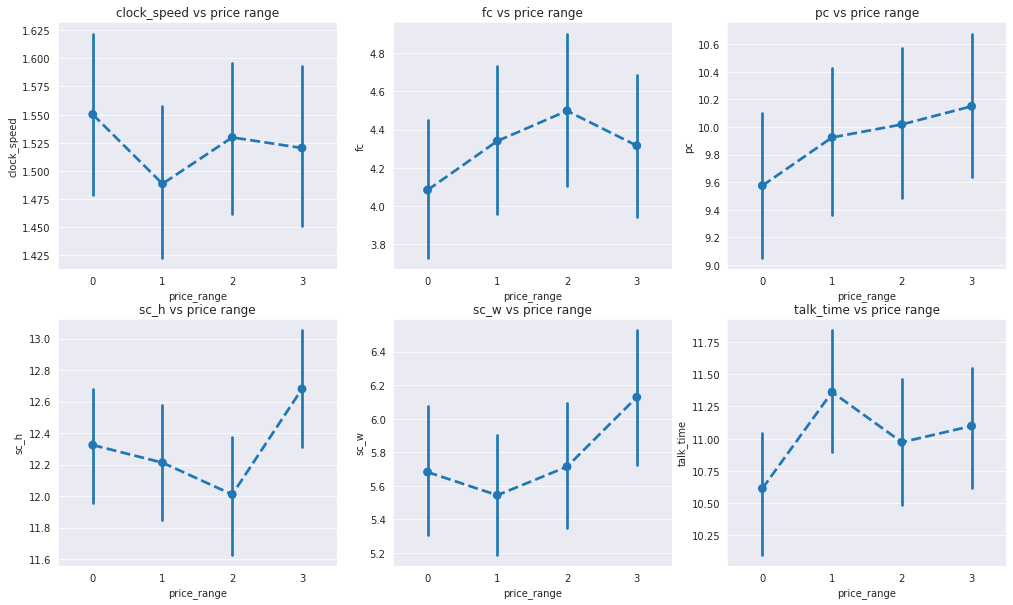

In [ ]:
# visualizing price range grouped by these variables using pointplot
l1 = ['clock_speed', 'fc', 'pc', 'sc_h', 'sc_w', 'talk_time']
plt.figure(figsize=(17,10))
for index, elem in enumerate(l1):
  plt.subplot(2,3,index+1)
  sns.pointplot(x='price_range',y=elem,data=df, linestyles='--')
  plt.title(f'{elem} vs price range')
plt.show()

Point plot shows us the estimate of central tendency of numerical type variables with estimate error.

1. For low range price(0), the clock speed is high

2. price range is increasing with increase in front camera and primary camera megapixel.

3. screen height and width decrease initially for increase in price range but then increses.

4. talk time is higher for high range phones comparatively.

#### **Variables having medium range values - price range vs internal memory, mobile weight**







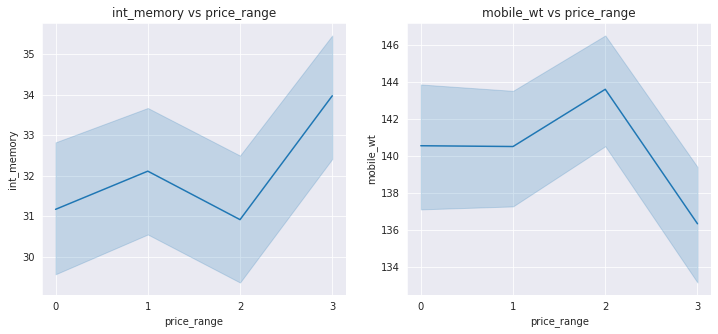

In [ ]:
# visualizing price range grouped by these variables using lineplot
l1 = ['int_memory','mobile_wt']
plt.figure(figsize=(12,5))
for index, elem in enumerate(l1):
  plt.subplot(1,2,index+1)
  sns.lineplot(x='price_range', y=elem, data=df)
  plt.xticks([0,1,2,3])
  plt.title(f'{elem} vs price_range')
plt.show()

* We can observe drastic increase in internal memory for very high prices.
* Also there is a drastic decrease in mobile weight for very high prices.

#### **Variables having high range values - price range vs battery power, pixel height, pixel width, ram**

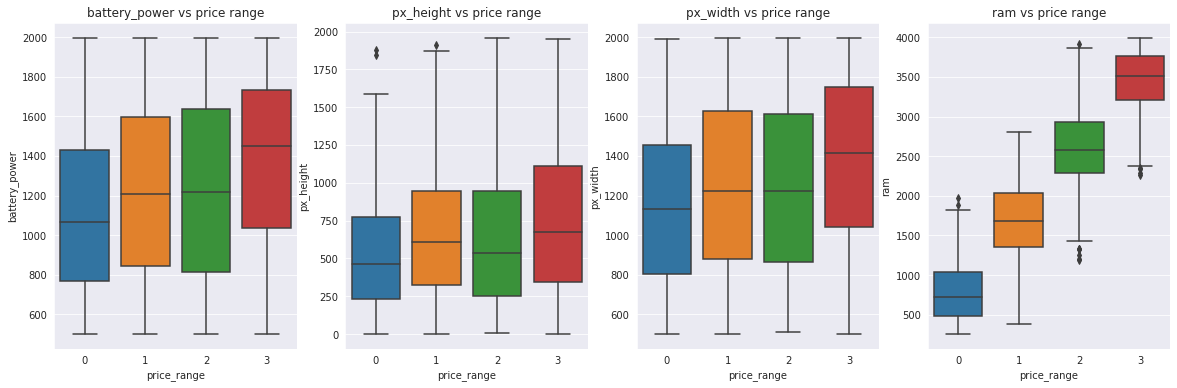

In [ ]:
# visualizing price range grouped by these variables using boxplot
list1=['battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,6))
for index,elem in enumerate(list1):
  plt.subplot(1,4,index+1)
  sns.boxplot(x='price_range',y=elem,data=df)
  plt.xticks([0,1,2,3])
  plt.title(f'{elem} vs price range')
plt.show()

Mean values of battery power, px_height, px_width, ram increases with increase in price range.

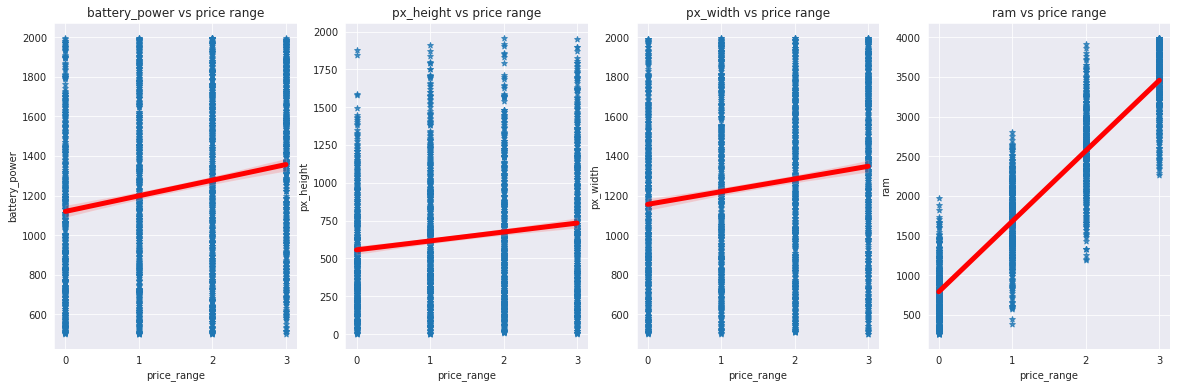

In [ ]:
# visualizing price range grouped by these variables using lineplot
list1=['battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,6))
for index,elem in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,4,index+1)
  plt.xticks(xtick)
  sns.regplot(x='price_range',y=elem,data=df, marker='*', 
              line_kws={'lw': 5, 'color': 'red'})
  plt.title(f'{elem} vs price range')
plt.show()

From the above graph we can see that all the variables are in increasing trend with increase in price range. Ram has the most direct impact.

#### **Correlation**

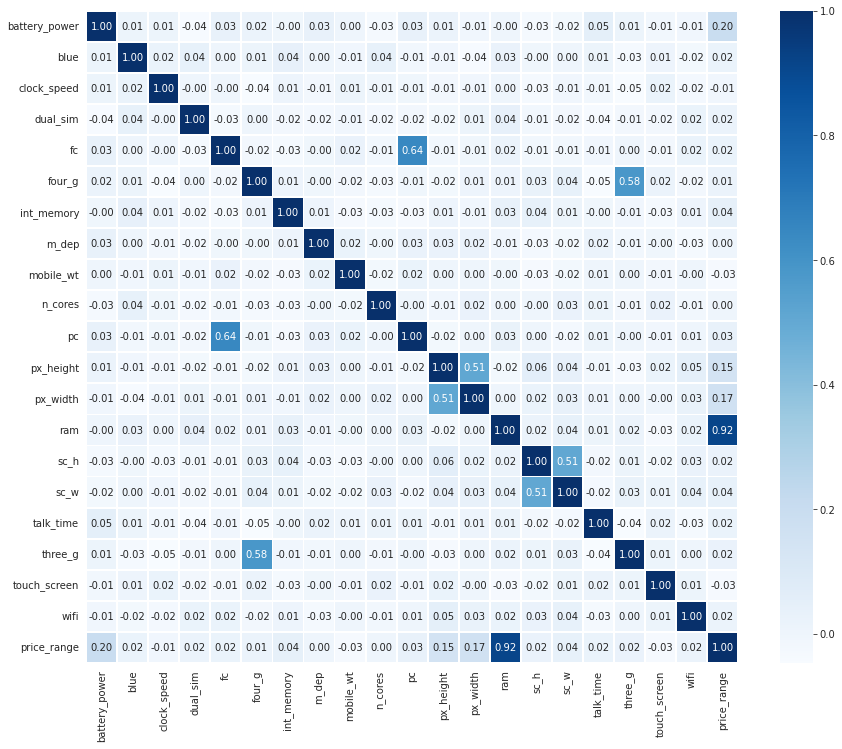

In [ ]:
# finding correlation using heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap='Blues', square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

* pc is correlated with fc.
* 3g and 4g are moderately correlated.
* sc_h and sc_w are moderately correlated. We will try to change them into a single variable.
* px_width and px_height are moderately correlated. We will try to change them into a single variable.
* ram is highly correlated with our price range. May be one the most important factor in determining the price.

### **Data Wrangling**

**Missing Values**

In [ ]:
# checking for missing values in each column
print("The number of missing values in each variable is:\n")
print(df.isnull().sum())

The number of missing values in each variable is:

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


Great! We don't have any missing values in our dataset

In [ ]:
# check duplicates
len(df[df.duplicated()])

0

There are no duplicate values.

#### **Outliers**

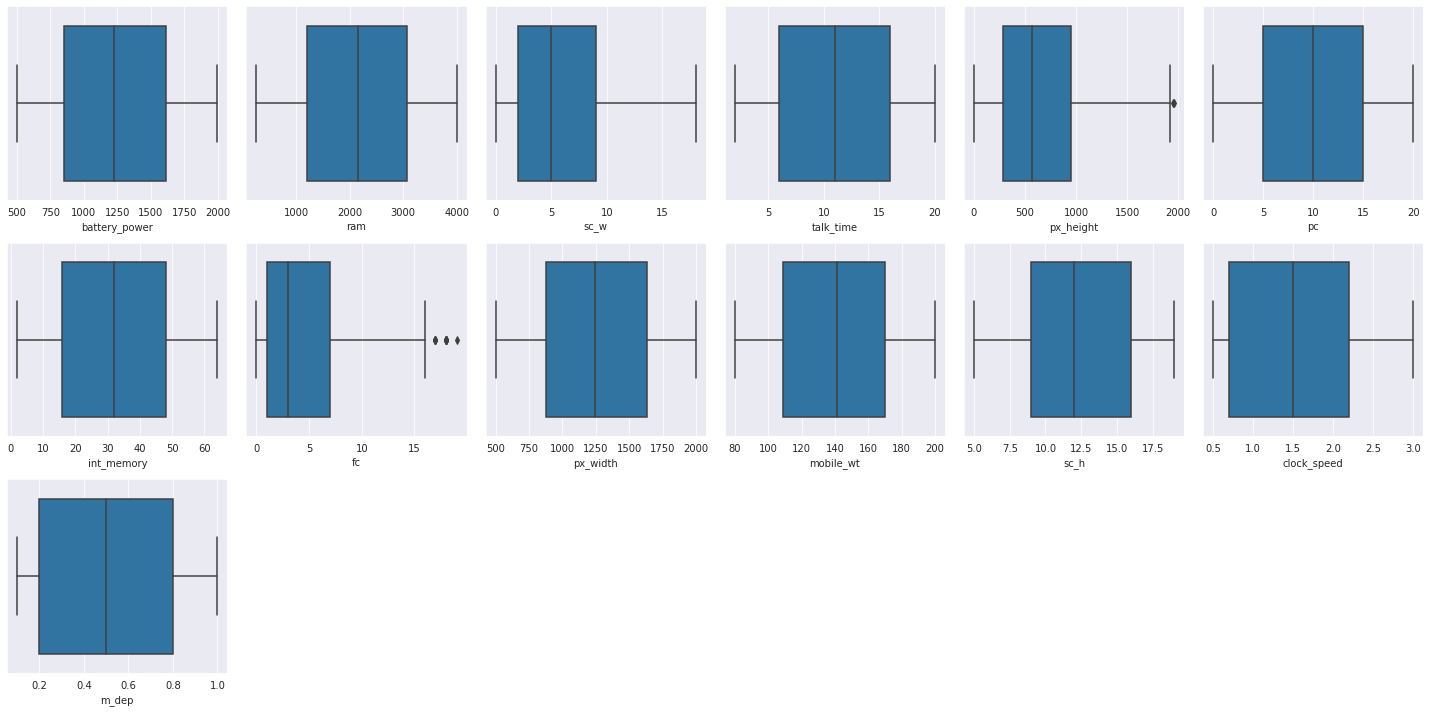

In [ ]:
# checking outliers for discrete and continous type variables using box plot
plt.figure(figsize=(20,10))
plotnumber = 1
for item in num_features:
  if plotnumber <= 13:
    ax = plt.subplot(3,6,plotnumber)
    sns.boxplot(df[item])
    plt.xlabel(item)
  plotnumber+=1
plt.tight_layout()

We see outliers in two of our features. Those are fc(front camera) and px_height(pixel resolution height).
But at this point we will ignore the outliers because they are not far away from the maximum value.

**Modifying Columns**

In [ ]:
# make a copy of dataset to make changes
df1 = df.copy()

In [ ]:
# now check the rows with sc_w = 0
df1[df1['sc_w'] == 0].shape[0]

180

In [ ]:
# check the mean value of sc_w for each price range 
df1.groupby('price_range')['sc_w'].mean()

price_range
0    5.682
1    5.544
2    5.714
3    6.128
Name: sc_w, dtype: float64

In [ ]:
# replace 0 with NaN values
df1['sc_w'] = df1['sc_w'].replace(0, np.nan)

In [ ]:
# fill the NaN values with the mean values of sc_w based on their price range
df1['sc_w'] = df1['sc_w'].fillna(df1.groupby('price_range')['sc_w'].transform('mean'))

In [ ]:
# recheck for 0 values
df1[df1['sc_w'] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
# now check the rows with px_height = 0
df1[df1['px_height'] == 0].shape[0]

2

In [ ]:
# # drop rows with null values
# df1 = df1[df1['px_height']!=0]

In [ ]:
# replace 0 with NaN values
df1['px_height'] = df1['px_height'].replace(0, np.nan)

In [ ]:
# fill the NaN values with the mean values of px_height based on their price range
df1['px_height'] = df1['px_height'].fillna(df1.groupby('price_range')['px_height'].transform('mean'))

In [ ]:
# recheck for 0 values
df1[df1['px_height'] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
# check missing values
print(df1.isnull().sum().sum())

0

In [ ]:
# check the shape of data
print(df1.shape)

(2000, 18)


In [ ]:
# create screen size variable which gives us the diagonal length of the mobile
df1['screen_size'] = np.sqrt((df1['sc_h']**2) + (df1['sc_w']**2)).round(2)
# creating single column out of 'px_height' and 'px_width'
df1['pixels'] = df1['px_height'] * df1['px_width']

Let's create a new variable 'network' in which, the mobiles that does not support both 3g and 4g is assigned 0, one that only support three_g should be assigned 1 and one that support both three_g and four_g should be assigned 2.

In [ ]:
# create a network feature by adding three_g and four_g
df1['network'] = df1['four_g'] + df1['three_g']

In this new feature 'network', there will be three categories:

* 0: Supports neither of 3G or 4G
* 1: Supports 3G but not 4G
* 2: Supports both 3G and 4G

In [ ]:
# dropping these columns
df1.drop(columns=['px_height','px_width','sc_h','sc_w','three_g','four_g'],axis=1, inplace=True)

In [ ]:
# checking our modifications
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range,screen_size,pixels,network
0,842,0,2.2,0,1,7,0.6,188,2,2,2549,19,0,1,1,11.40,15120.0,0
1,1021,1,0.5,1,0,53,0.7,136,3,6,2631,7,1,0,2,17.26,1799140.0,2
2,563,1,0.5,1,2,41,0.9,145,5,6,2603,9,1,0,2,11.18,2167308.0,2
3,615,1,2.5,0,0,10,0.8,131,6,9,2769,11,0,0,2,17.89,2171776.0,1
4,1821,1,1.2,0,13,44,0.6,141,2,14,1411,15,1,0,1,8.25,1464096.0,2


In [ ]:
# checking no. of independent features after modification
print('The number of independent features after modification is:',len(df1.drop(['price_range'], axis=1).columns.to_list()))

The number of independent features after modification is: 17


Great! 3 new columns have been added and our independent features have reduced from 20 to 17. Now our dataset is ready for modelling.

### **Train-Test Split and Standardization**
Last step one should perform before feeding the dataset to machine learning algorithms is to split the data into training and test set. The training set is used to train the model and test set acts as unseen data and is used to evaluate the model performance. Training and test set proportions may vary such as 60:40, 70:30, 75:25 but the norm is 80:20 for training and test set respectively. This is very important in order to check the performance of the model as it might do very good on the training set but perform poor on any unseen data. A model can be considered good if both the training and test performance are somewhat similar.

In [ ]:
# creating variables to store independent features and dependent feature
X = df1.drop(columns=['price_range'])
y = df1['price_range']

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)    # random_state=0 to ensure same observations in each set everytime we run

In [ ]:
# checking the shapes
print(f'The shapes of train and test set for independent variables are: X_train={X_train.shape}, X_test={X_test.shape}')
print(f'The shapes of train and test set for dependent variables are: y_train={y_train.shape}, y_test={y_test.shape}')

The shapes of train and test set for independent variables are: X_train=(1600, 17), X_test=(400, 17)
The shapes of train and test set for dependent variables are: y_train=(1600,), y_test=(400,)


Great! Now that we have splitted our data other important step one should perform, is to standardize or normalize the independent variables. This is to ensure a consistent range of values are fed into the model. Also it make the predictors mean 0 so it is easy to find the intercept. We will be using StandardScaler to standardize our data. It is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1.

In [ ]:
# standardizing the independant variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Helper Functions**

**Feature Importances**

In [ ]:
# function to plot feature importances
def plot_importance(model):
    """
    Fuction to plot variable importance from machine learning model.
    Note: the model requires to have "model.feature_importances_".
    
    Inputs
    -------
    - model: a model with a object ".feature_importances_"

    Returns
    -------
    - feature importance plot
    

    """
    feature_imp = pd.DataFrame({"Variable": X.columns,"Importance": model.feature_importances_})
    feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
    sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'],
                palette='rainbow', edgecolor='k')
    plt.xlabel('Relative Importance')
    plt.title(f'Variable Importance {model.__class__.__name__}')
    plt.show()

**Evaluation metrics**

Evaluation metrics are used to determine the performance of the models. There are various metrics used for classification problem. Some of them are:

1. Accuracy : Accuracy is defined as the ratio of correct predictions to actual predictions.

2. Precision : Precision for a label is defined as the number of true positives divided by the number of predicted positives.

3. Recall : Recall for a label is defined as the number of true positives divided by the total number of actual positives.

4. F1-Score : This is defined as the harmonic mean of precision and recall.

Also, a confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

In [ ]:
comparison_columns = ['Model_Name', 'Train_Accuracy', 'Train_Precision', 'Train_Recall', 'Train_F1score',
                         'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1score']

In [ ]:
# function to evaluate model
def evaluate(model_name, model_variable, X_train, y_train, X_test, y_test):

  # make predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Train set evaluation
  train_accuracy = round(accuracy_score(y_train,y_pred_train),4)
  train_precision = round(precision_score(y_train,y_pred_train, average='weighted'),4)
  train_recall = round(recall_score(y_train,y_pred_train, average='weighted'),4)
  train_f1score = round(f1_score(y_train,y_pred_train, average='weighted'),4)
  #train_auc = roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class = 'ovr')

  # Test set evaluation
  test_accuracy = round(accuracy_score(y_test,y_pred_test),4)
  test_precision = round(precision_score(y_test,y_pred_test, average='weighted'),4)
  test_recall = round(recall_score(y_test,y_pred_test, average='weighted'),4)
  test_f1score = round(f1_score(y_test,y_pred_test, average='weighted'),4)
  #train_auc = roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class = 'ovr')

  # classification report
  print('Classification Report - Train Set:')
  report_train = classification_report(y_train,y_pred_train)
  print(report_train)
  cm1 = confusion_matrix(y_train, y_pred_train)
  print('_____________________________________________________\n')
  print('Classification Report - Test Set:')
  report_test = classification_report(y_test,y_pred_test)
  print(report_test)
  cm2 = confusion_matrix(y_test, y_pred_test)

  # confusion matrix
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,3))
  sns.heatmap(cm1, annot=True, ax=ax1, fmt='d', cmap='Blues')
  ax1.set_title('Confusion Matrix - Train set')
  ax1.set_xlabel('Predicted Values')
  ax1.set_ylabel('Actual Values')
  sns.heatmap(cm2, annot=True, ax=ax2, fmt='d', cmap='Blues')
  ax2.set_title('Confusion Matrix - Test set')
  ax2.set_xlabel('Predicted Values')
  ax2.set_ylabel('Actual Values')


  # Storing results
  global comparison_columns
  eval_metrics = [model_name, train_accuracy, train_precision, train_recall, train_f1score, test_accuracy, test_precision, test_recall, test_f1score]
  final_dict = dict(zip(comparison_columns, eval_metrics))
  return [final_dict]

In [ ]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for i in dict_list:
    final_list.append(i)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

#### **Fitting Models**
In this section we are going to implement various machine learning algorithms to make our predictions. Some of the algorithms we will be using are: Random Forest Classifier, XGBoost Classifier and Support Vector Classifier. We will also be evaluating the model using different evaluation metrics and choose the best model among them. The detailed step we will be following are as follows:

1. Initial fitting of the model.

2. Evaluating the performance of the model using metrics.

3. Hyperparameter tuning to improve model performance and to reduce if overfitting occurs.

Lets start with our first model i.e., Random Forest

### **Random Forest Classifier**

**Initial fitting**

In [ ]:
# creating instance of random forest and fitting data
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Classification Report - Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

_____________________________________________________

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        95
           1       0.83      0.83      0.83        92
           2       0.80      0.73      0.76        99
           3       0.90      0.93      0.91       114

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



[{'Model_Name': 'Random Forest Classfier',
  'Test_Accuracy': 0.87,
  'Test_F1score': 0.868,
  'Test_Precision': 0.8673,
  'Test_Recall': 0.87,
  'Train_Accuracy': 1.0,
  'Train_F1score': 1.0,
  'Train_Precision': 1.0,
  'Train_Recall': 1.0}]

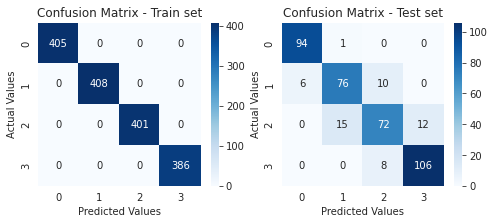

In [ ]:
# evaluating the model
random_forest_classifier = evaluate('Random Forest Classfier', rfc, X_train, y_train, X_test, y_test)
random_forest_classifier

It looks like the model has performed really well on the training set with perfect accuracy of 1. But accuracy has reduced to 0.87 for the test set. Even though it can be considered a good accuracy but comparing with the training set accuracy, there is a significant difference. there is overfitting in our model. There are some parameters of random forest that can be tuned for the model’s better performance.

1. n_estimators: The more trees, the less likely the algorithm is to overfit. So try increasing this parameter. The lower this number, the closer the model is to a decision tree, with a restricted feature set.

2. max_features: You should try reducing this number. This defines how many features each tree is randomly assigned.

3. max_depth: This parameter will reduce the complexity of the learned models, lowering over fitting risk.

4. min_samples_leaf: Try setting these values greater than one. This has a similar effect to the max_depth parameter, it means the branch will stop splitting once the leaves have that number of samples each.

In [ ]:
# add results to comparison table
add_list_to_final_df(random_forest_classifier)

### **Random Forest Classifier - Hyper-parameter Tuning**

In [ ]:
# hyperparameter grid
params_dict = {
    'n_estimators' : [100,200,300],
    'max_depth' : np.arange(4,10),
    'min_samples_split' : np.arange(10,100,20),
    'min_samples_leaf' : np.arange(10,100,10),
}

In [ ]:
# Random search
rf_random = RandomizedSearchCV(estimator=rfc,param_distributions = params_dict,cv = 5,scoring='accuracy',n_jobs=-1,random_state=0)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'min_samples_split': array([10, 30, 50, 70, 90]),
                                        'n_estimators': [100, 200, 300]},
                   random_state=0, scoring='accuracy')

In [ ]:
# checking the best parameters
rf_random.best_params_

{'max_depth': 7,
 'min_samples_leaf': 50,
 'min_samples_split': 90,
 'n_estimators': 200}

In [ ]:
# storing the best estimator in a variable
rf_optimal=rf_random.best_estimator_
rf_optimal

RandomForestClassifier(max_depth=7, min_samples_leaf=50, min_samples_split=90,
                       n_estimators=200, random_state=0)

Classification Report - Train Set:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       405
           1       0.78      0.79      0.78       408
           2       0.84      0.74      0.79       401
           3       0.94      0.96      0.95       386

    accuracy                           0.86      1600
   macro avg       0.86      0.86      0.86      1600
weighted avg       0.86      0.86      0.86      1600

_____________________________________________________

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        95
           1       0.71      0.75      0.73        92
           2       0.76      0.59      0.66        99
           3       0.88      0.96      0.92       114

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.81       400
weighted avg       0.82      0.82      0.82       400



[{'Model_Name': 'Random Forest Classifier - Tuned',
  'Test_Accuracy': 0.825,
  'Test_F1score': 0.8186,
  'Test_Precision': 0.8198,
  'Test_Recall': 0.825,
  'Train_Accuracy': 0.8638,
  'Train_F1score': 0.8618,
  'Train_Precision': 0.8623,
  'Train_Recall': 0.8638}]

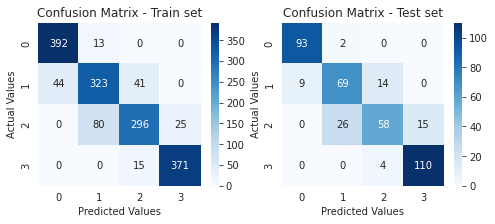

In [ ]:
# evaluating the model
random_forest_classifier_tuned = evaluate('Random Forest Classifier - Tuned', rf_optimal, X_train, y_train, X_test, y_test)
random_forest_classifier_tuned

It looks like the accuracy of training and test set is 0.86 and 0.82 respectively. After using random search the difference has been reduced to 4. This can be considered a better model than the initial fit.

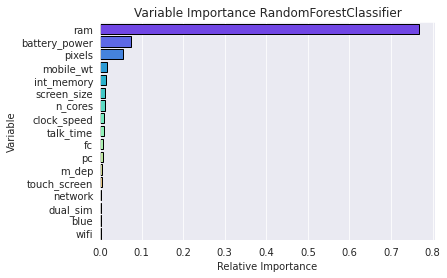

In [ ]:
# visualizing feature importance
plot_importance(rf_optimal)

In [ ]:
# add results to comparison table
add_list_to_final_df(random_forest_classifier_tuned)

### **XGBoost Classifier**

In [ ]:
# implementing XGBoost classifier
xgb_model = XGBClassifier(random_state=0,n_jobs=-1)
xgb_model.fit(X_train,y_train)

XGBClassifier(n_jobs=-1, objective='multi:softprob')

Classification Report - Train Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       405
           1       0.96      0.98      0.97       408
           2       0.97      0.97      0.97       401
           3       0.99      0.98      0.99       386

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

_____________________________________________________

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.88      0.86      0.87        92
           2       0.85      0.84      0.84        99
           3       0.94      0.96      0.95       114

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



[{'Model_Name': 'XGBoost Classifier',
  'Test_Accuracy': 0.91,
  'Test_F1score': 0.9096,
  'Test_Precision': 0.9094,
  'Test_Recall': 0.91,
  'Train_Accuracy': 0.9781,
  'Train_F1score': 0.9782,
  'Train_Precision': 0.9782,
  'Train_Recall': 0.9781}]

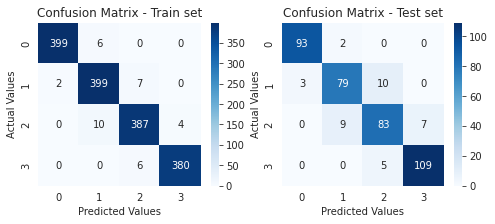

In [ ]:
# evaluating the model
xgbc = evaluate('XGBoost Classifier', xgb_model, X_train, y_train, X_test, y_test)
xgbc

Initial fitting of the xgboost model gives accuracy of 0.98 and 0.91 for training and test set respectively. Again the difference is about 7 and this can be considered a case of overfitting. Let us try to tune the hyperparameters and see if we get better results.

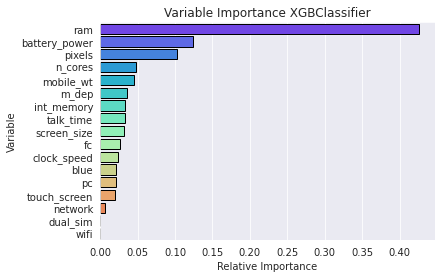

In [ ]:
# visualizing feature importance
plot_importance(xgb_model)

In [ ]:
# add results to comparison table
add_list_to_final_df(xgbc)

### **XGBoost Classifier - Hyper-parameter Tuning**

In [ ]:
# Hyperparameter Grid
param_dict1 = {'n_estimators' : list(np.arange(5,15,2,dtype='int64')),
              'max_depth' : list(np.arange(10,20,1,dtype='int64')),
               'min_child_weight':list(np.linspace(10,20,num=1,dtype='int64')),
               'gamma':list(np.linspace(0,2,num=20,dtype='int64')),
               'subsample':[0.3,0.5,0.6],
               'learning_rate':list(np.arange(0.05,0.15,0.01))}

In [ ]:
# Random search
xgb_random = RandomizedSearchCV(estimator=xgb_model,param_distributions = param_dict1,cv = 5,scoring='accuracy',n_jobs=-1,random_state=0)
xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(n_jobs=-1,
                                           objective='multi:softprob'),
                   n_jobs=-1,
                   param_distributions={'gamma': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                                  1, 1, 1, 1, 1, 1, 1, 1, 1,
                                                  2],
                                        'learning_rate': [0.05,
                                                          0.060000000000000005,
                                                          0.07,
                                                          0.08000000000000002,
                                                          0.09000000000000001,
                                                          0.1,
                                                          0.11000000000000001,
                                                          0.12000000000000001,
                     

In [ ]:
# checking the best parameters
xgb_random.best_params_

{'gamma': 0,
 'learning_rate': 0.12000000000000001,
 'max_depth': 14,
 'min_child_weight': 10,
 'n_estimators': 13,
 'subsample': 0.5}

In [ ]:
# storing the best estimator in a variable
xgbc_optimal=xgb_random.best_estimator_
xgbc_optimal

XGBClassifier(learning_rate=0.12000000000000001, max_depth=14,
              min_child_weight=10, n_estimators=13, n_jobs=-1,
              objective='multi:softprob', subsample=0.5)

Classification Report - Train Set:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       405
           1       0.86      0.83      0.84       408
           2       0.83      0.84      0.84       401
           3       0.93      0.91      0.92       386

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600

_____________________________________________________

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        95
           1       0.80      0.76      0.78        92
           2       0.77      0.70      0.73        99
           3       0.86      0.94      0.90       114

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



[{'Model_Name': 'XGBoost Classifier - Tuned',
  'Test_Accuracy': 0.8425,
  'Test_F1score': 0.8397,
  'Test_Precision': 0.839,
  'Test_Recall': 0.8425,
  'Train_Accuracy': 0.8844,
  'Train_F1score': 0.8841,
  'Train_Precision': 0.8842,
  'Train_Recall': 0.8844}]

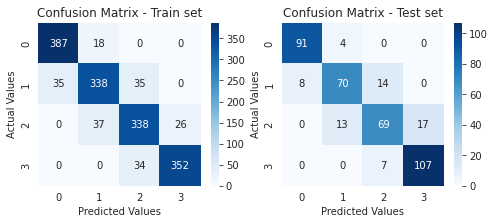

In [ ]:
# evaluating the model
xgb_tuned = evaluate('XGBoost Classifier - Tuned', xgbc_optimal, X_train, y_train, X_test, y_test)
xgb_tuned

Great! The difference has been reduced to 4. Given the simplicity of the dataset and less no. of observations this can be considered a good model.

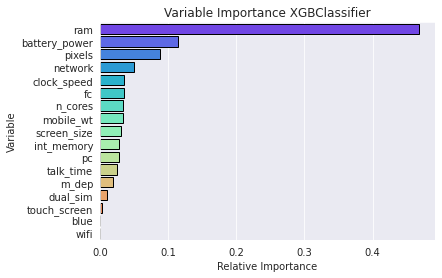

In [ ]:
# visualizint feature importances
plot_importance(xgbc_optimal)

In [ ]:
# add results to comparison table
add_list_to_final_df(xgb_tuned)

### **Support Vector Classifier**

In [ ]:
# Implementing Support Vector Classifier
svc = SVC(random_state=0)
svc.fit(X_train,y_train)

SVC(random_state=0)

Classification Report - Train Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       405
           1       0.97      0.98      0.97       408
           2       0.97      0.97      0.97       401
           3       0.99      0.98      0.98       386

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

_____________________________________________________

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        95
           1       0.84      0.83      0.83        92
           2       0.79      0.84      0.81        99
           3       0.95      0.89      0.92       114

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



[{'Model_Name': 'SVC',
  'Test_Accuracy': 0.88,
  'Test_F1score': 0.8806,
  'Test_Precision': 0.8822,
  'Test_Recall': 0.88,
  'Train_Accuracy': 0.9775,
  'Train_F1score': 0.9775,
  'Train_Precision': 0.9776,
  'Train_Recall': 0.9775}]

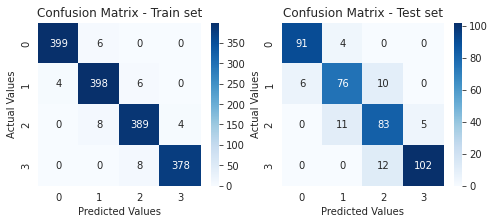

In [ ]:
# evaluating the model
svcc = evaluate('SVC', svc, X_train, y_train, X_test, y_test)
svcc

Possible Overfitting. Let's try to tune the hyperparameters and see if we get better results.

In [ ]:
# add results to comparison table
add_list_to_final_df(svcc)

### **SVC - Hyper-parameter Tuning**
**Optuna:** The Optuna is an automatic hyper-parameter optimization software framework designed for machine learning tasks. It is light weight, versatile and platform agnostic. It has simple installation, uses Python syntax for condition and loops. It adopts state-of-the-art algorithms for sampling hyper-parameters and efficiently pruning unpromising trials. It supports parallelization and provides an excellent visualization for the further investigation of the output and studies.

In [ ]:
# install optuna
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 14.2 MB/s 
     |████████████████████████████████| 209 kB 69.2 MB/s 
     |████████████████████████████████| 81 kB 10.9 MB/s 
     |████████████████████████████████| 78 kB 8.2 MB/s 
     |████████████████████████████████| 49 kB 7.4 MB/s 
     |████████████████████████████████| 146 kB 96.5 MB/s 
     |████████████████████████████████| 112 kB 88.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=02363c5afd84c68e6cf9a3c2e29fb3c951496d82024d5597857c910cbc81fe60
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
# importing optuna and required packages
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler

#### **Steps to use Optuna**
1. Create an objective function
 * This function will have logic for creating a model, train it and evaluate it on the validation set. After evaluation it should return a single value which is generally the output of the evaluation metric and needs to be minimized/maximized.
 * This function takes input as a single parameter which is an instance of Trial class. The object has details about one combination of hyperparameters with which the ML algorithm will be executed.
2. Create Study Object.
3. Call optimize() method on study by giving objective function created in the first step to find the best hyperparameters combination. It'll execute the objective function more than once by giving different Trial instances each having different hyperparameters combinations.

#### **Optuna is based on the concept of Study and Trial.**
* The trial is one combination of hyperparameters that will be tried with an algorithm.
* The study is the process of trying different combinations of hyperparameters to find the one combination that gives the best results. The study generally consists of many trials.

In [ ]:
def objective_svc(trial):
  params_svc = {
      'C': trial.suggest_float("C",0.01,20.0,log=True),
      'gamma': trial.suggest_categorical('gamma',[1, 0.1, 0.01, 0.001]),
      'kernel': trial.suggest_categorical('kernel', ['rbf','poly','linear']),
  }
  svco = SVC(**params_svc)
  svco.fit(X_train, y_train)
  accuracy = svco.score(X_test, y_test)
  return accuracy 

In [ ]:
study1 = optuna.create_study(direction='maximize')
study1.optimize(objective_svc, n_trials=50, show_progress_bar=True)

[I 2022-06-10 11:09:27,897] A new study created in memory with name: no-name-671c5bb0-9874-474e-8059-d6f990809397


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2022-06-10 11:09:28,083] Trial 0 finished with value: 0.8975 and parameters: {'C': 0.7504271065697223, 'gamma': 0.01, 'kernel': 'rbf'}. Best is trial 0 with value: 0.8975.
[I 2022-06-10 11:09:28,136] Trial 1 finished with value: 0.92 and parameters: {'C': 0.28598040211285675, 'gamma': 0.01, 'kernel': 'linear'}. Best is trial 1 with value: 0.92.
[I 2022-06-10 11:09:28,374] Trial 2 finished with value: 0.23 and parameters: {'C': 0.558173568366606, 'gamma': 1, 'kernel': 'rbf'}. Best is trial 1 with value: 0.92.
[I 2022-06-10 11:09:28,522] Trial 3 finished with value: 0.7825 and parameters: {'C': 0.5685677413734629, 'gamma': 1, 'kernel': 'poly'}. Best is trial 1 with value: 0.92.
[I 2022-06-10 11:09:28,789] Trial 4 finished with value: 0.25 and parameters: {'C': 12.442341218714603, 'gamma': 1, 'kernel': 'rbf'}. Best is trial 1 with value: 0.92.
[I 2022-06-10 11:09:28,844] Trial 5 finished with value: 0.91 and parameters: {'C': 1.5517309909086008, 'gamma': 0.01, 'kernel': 'linear'}. Best

In [ ]:
svc_best_params = study1.best_trial.params
svc_best_params

{'C': 19.402557147049617, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
svc_optimal = SVC(**svc_best_params)
svc_optimal.fit(X_train, y_train)

SVC(C=19.402557147049617, gamma=0.001, kernel='linear')

Classification Report - Train Set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       405
           1       0.95      0.94      0.94       408
           2       0.92      0.93      0.92       401
           3       0.96      0.95      0.96       386

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

_____________________________________________________

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.90      0.93      0.91        92
           2       0.89      0.86      0.87        99
           3       0.95      0.94      0.94       114

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



[{'Model_Name': 'SVC - Tuned',
  'Test_Accuracy': 0.9275,
  'Test_F1score': 0.9274,
  'Test_Precision': 0.9275,
  'Test_Recall': 0.9275,
  'Train_Accuracy': 0.95,
  'Train_F1score': 0.95,
  'Train_Precision': 0.9501,
  'Train_Recall': 0.95}]

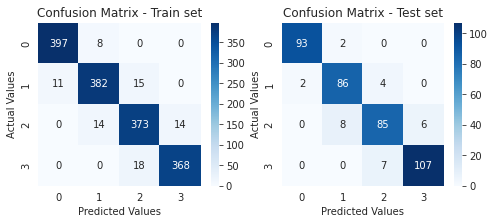

In [ ]:
# evaluating the model
svc_tuned = evaluate('SVC - Tuned', svc_optimal, X_train, y_train, X_test, y_test)
svc_tuned

* The accuracy of Support Vector Machine is increased by 5% after hyperparameter tuning.
* Test accuracy of SVM is about 93%. This indicates that our model is performing well.
* The accuracy score of Support Vector Machine is higher than all other models accuracy score.

In [ ]:
# add results to comparison table
add_list_to_final_df(svc_tuned)

In [ ]:
# optimization history plot
optuna.visualization.plot_optimization_history(study1)

This plot shows the best values at different trials during the optimization process. On the plot, the Objective Value on the y-axis is the accuracy of the model. We can see that trial 17 has the best accuracy of 0.9275. The Best Value line shows that optuna found good values for the hyper-parameters at 17th trial and was unable to improve further on those results that much in continuing to tune hyper-parameters out of 50 trials.

In [ ]:
# hyperparameter importances plot
optuna.visualization.plot_param_importances(study1)

This method plots hyperparameter importance and their values. As expected, we can see that the main hyperparameter affecting the performance of the model is kernel. kernel has the most important effect on the overall algorithm performance.

### **Model Explainability**

Model Explainability is the process of explaining and interpreting machine learning models. It is a way to know what is going on inside the model and how it is able to produce the desired results.

Here we are going to implement 'shap' techniques to understand our model behaviour.

SHAP stands for SHapley Additive exPlanations. SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we would make if that feature took some baseline value.

In [ ]:
# importing shap
!pip install shap
import shap
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 12.5 MB/s 


We will reduce data to 100 samples because earlier there were 2000 background data samples which were slowing down the run time.

In [ ]:
# reduce background data samples to 100 samples because of slow run time
l=X.columns.to_list()
X_train_sample = X_train[0:100, :]

In [ ]:
# creating a shap instance
pred_func = svc_optimal.decision_function
svm_explainer = shap.KernelExplainer(pred_func, data=X_train_sample)
svm_explaination = svm_explainer.shap_values(X_test)

  0%|          | 0/400 [00:00<?, ?it/s]

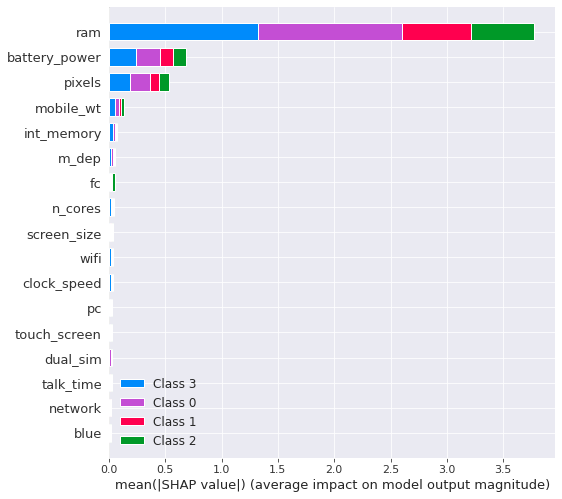

In [ ]:
# Visualizing
shap.summary_plot(svm_explaination, X_test, l)

Observations from the summary plot are:
1.	The most important features in determining the predictions are ram, battery power and pixels. 
2.	Higher values of ram are increasing the predicted class.
3.	Higher values of battery power are increasing the predicted class. 
4.	Higher values of pixels are increasing the predicted class.


## **Conclusion**

We performed various steps to determine our predictions for the mobile price range. We started with simple eda where we analysed our dependent variable as well as other independent variables. We found out the correlation, count, relationships with the dependent variable. We looked for missing values and outliers and did some feature modifications.

Finally we implemented 3 machine learning algorithms namely; RandomForest, XGBoost and SVM. We tried hyperparameter tuning to reduce overfitting and increase model performance. The best performance was given by SVM model. The results are:

In [ ]:
# displaying the results of evaluation metric values for all models
comparison_df

,Model_Name,Train_Accuracy,Train_Precision,Train_Recall,Train_F1score,Test_Accuracy,Test_Precision,Test_Recall,Test_F1score
0,Random Forest Classfier,1.0000,1.0000,1.0000,1.0000,0.8700,0.8673,0.8700,0.8680
1,Random Forest Classifier - Tuned,0.8638,0.8623,0.8638,0.8618,0.8250,0.8198,0.8250,0.8186
2,XGBoost Classifier,0.9781,0.9782,0.9781,0.9782,0.9100,0.9094,0.9100,0.9096
3,XGBoost Classifier - Tuned,0.8844,0.8842,0.8844,0.8841,0.8425,0.8390,0.8425,0.8397
4,SVC,0.9775,0.9776,0.9775,0.9775,0.8800,0.8822,0.8800,0.8806
5,SVC - Tuned,0.9500,0.9501,0.9500,0.9500,0.9275,0.9275,0.9275,0.9274


We also implemented shap techniques to identify the important features impacting our model predictions. We saw ram, battery power and pixels were the major contributors. Higher the values of these led to higher predicted values.

SVM performed much better than all other models because it has more accurate results and also able to generalize the features much better than others. The accuracy of our best model was 0.95 and 0.9275 for training and test set respectively.